In [1]:
#library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_auc_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from imblearn.combine import SMOTEENN
import os
from collections import Counter
from datetime import timedelta

In [2]:
#Accessing data file
data = pd.read_csv("D:/Madhubalaji/capstone/creditcard/creditcard.csv")

In [3]:
#Exploratory data analysis
print("data shape is :", data.shape)
print("Columns are :", data.columns)
print("Data types are: ", data.dtypes)

data shape is : (284807, 31)
Columns are : Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Data types are:  Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [4]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.23709

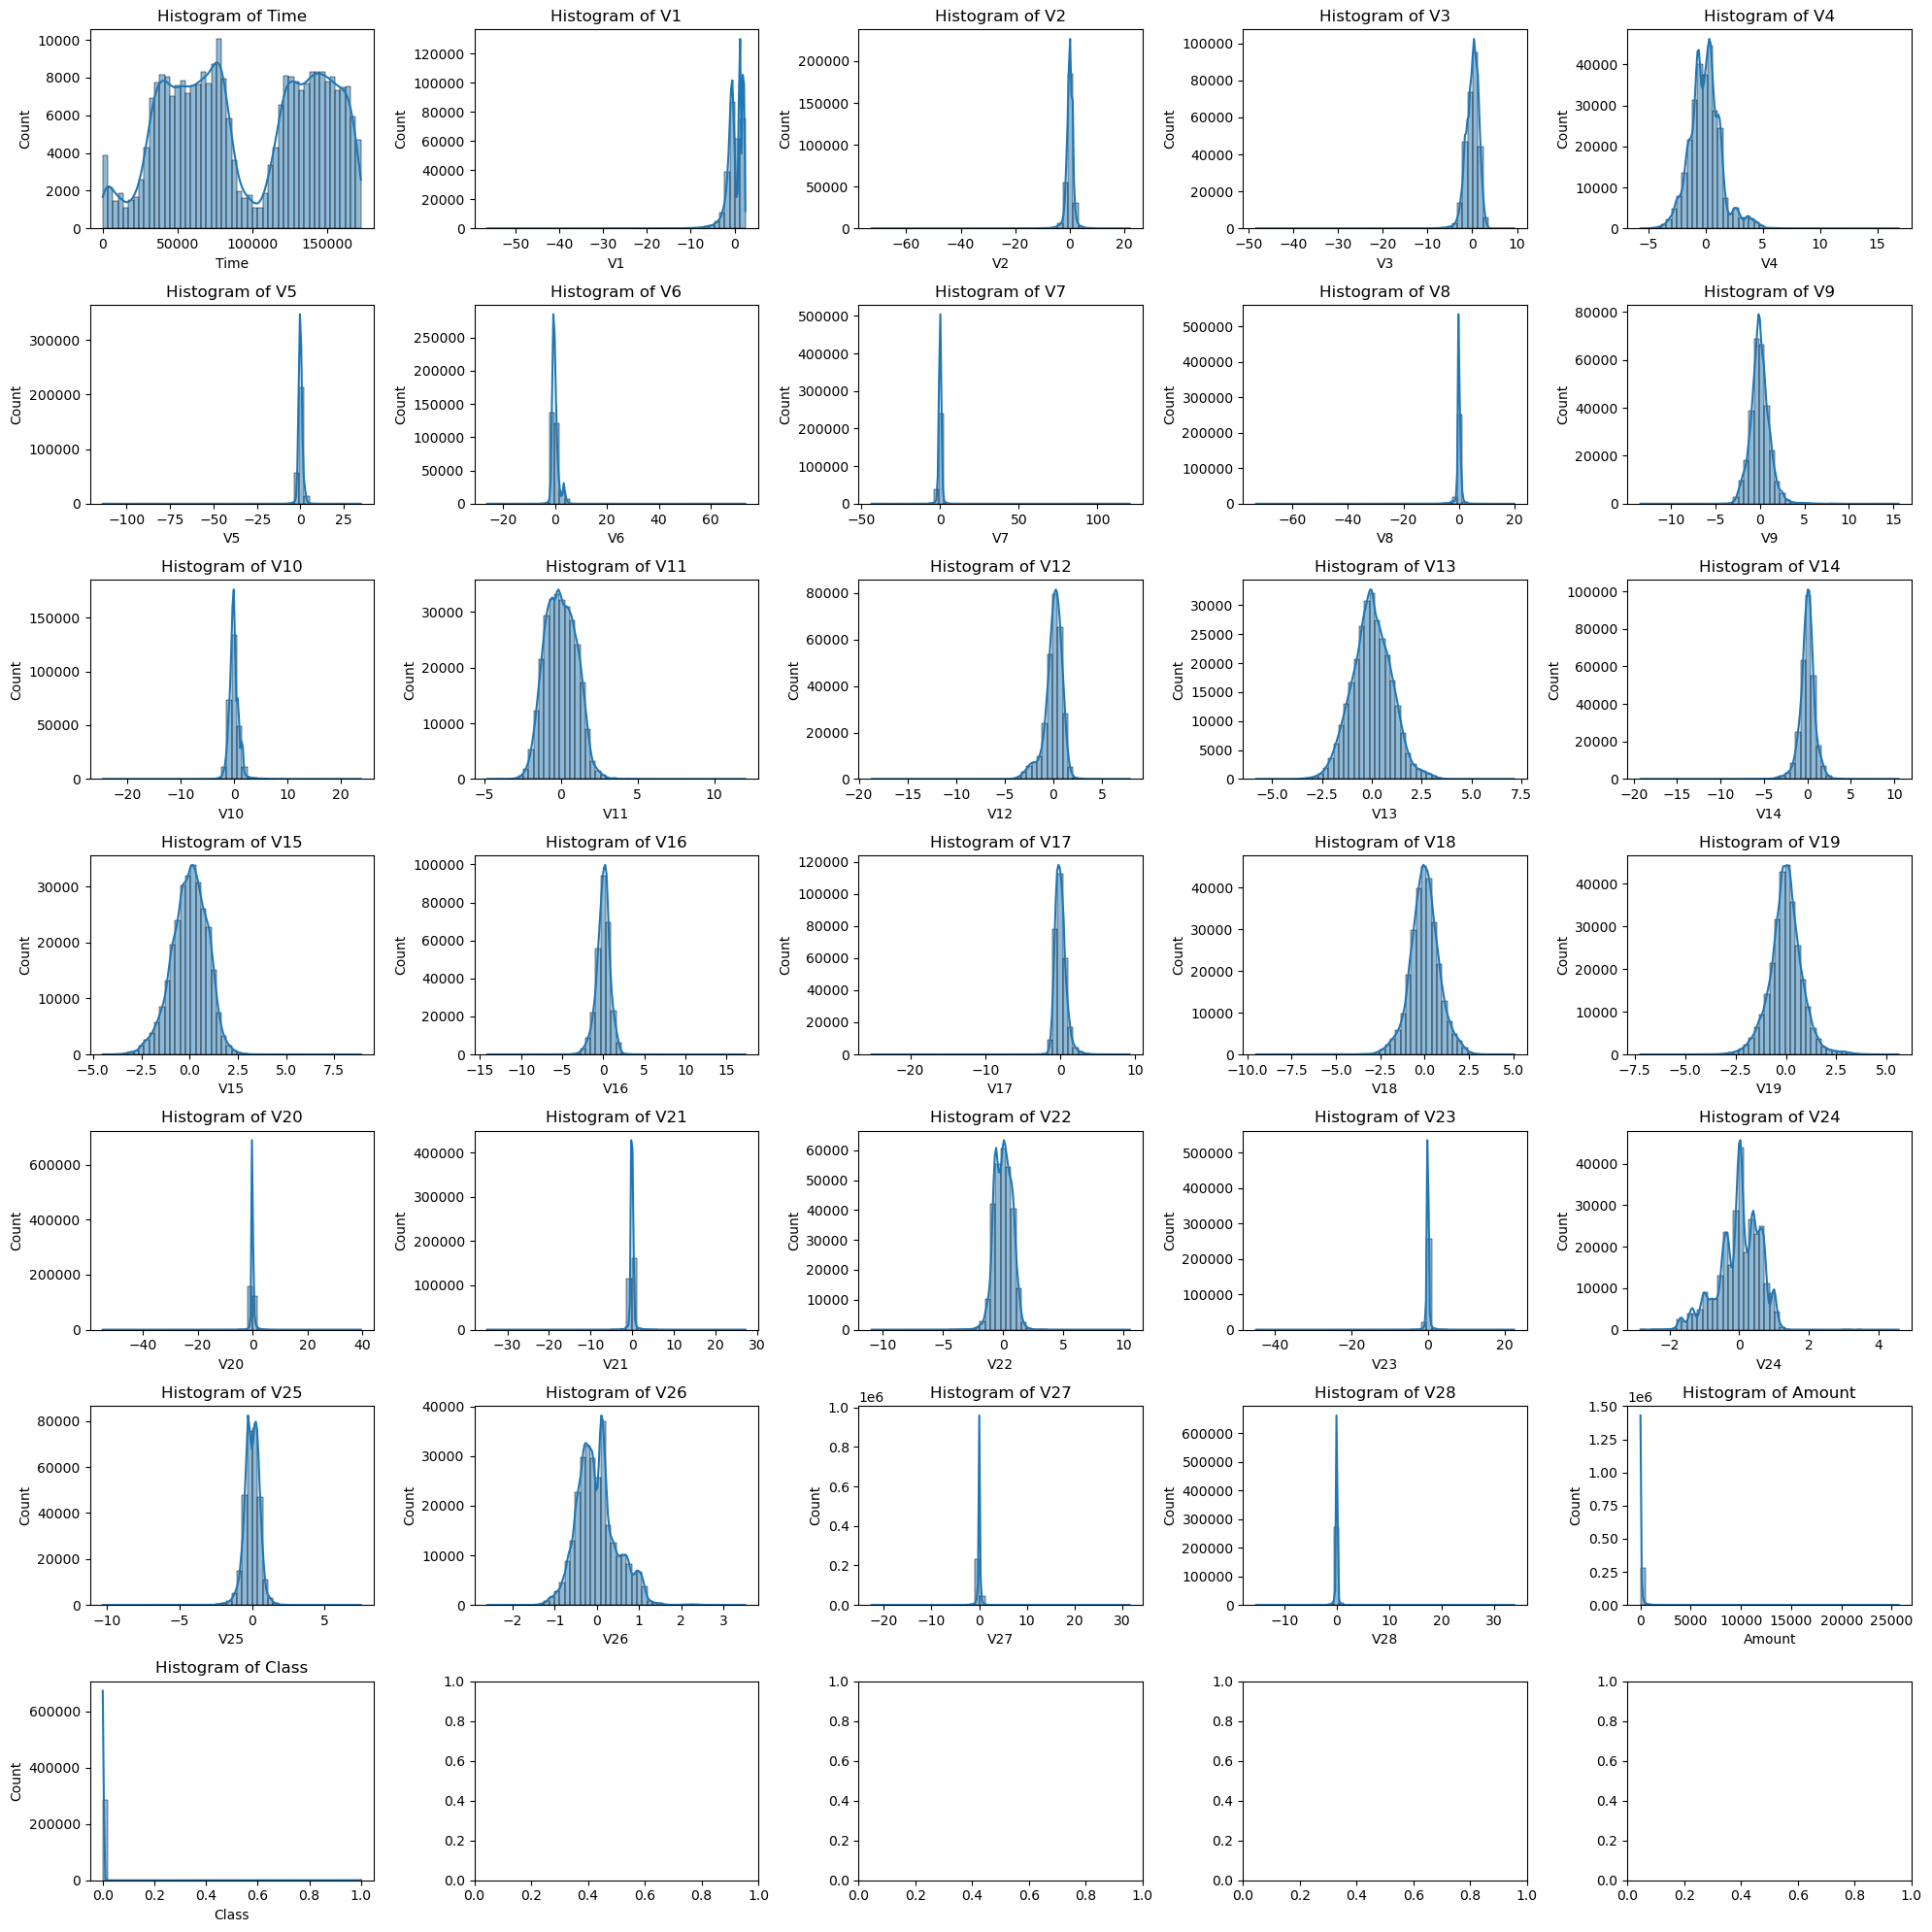

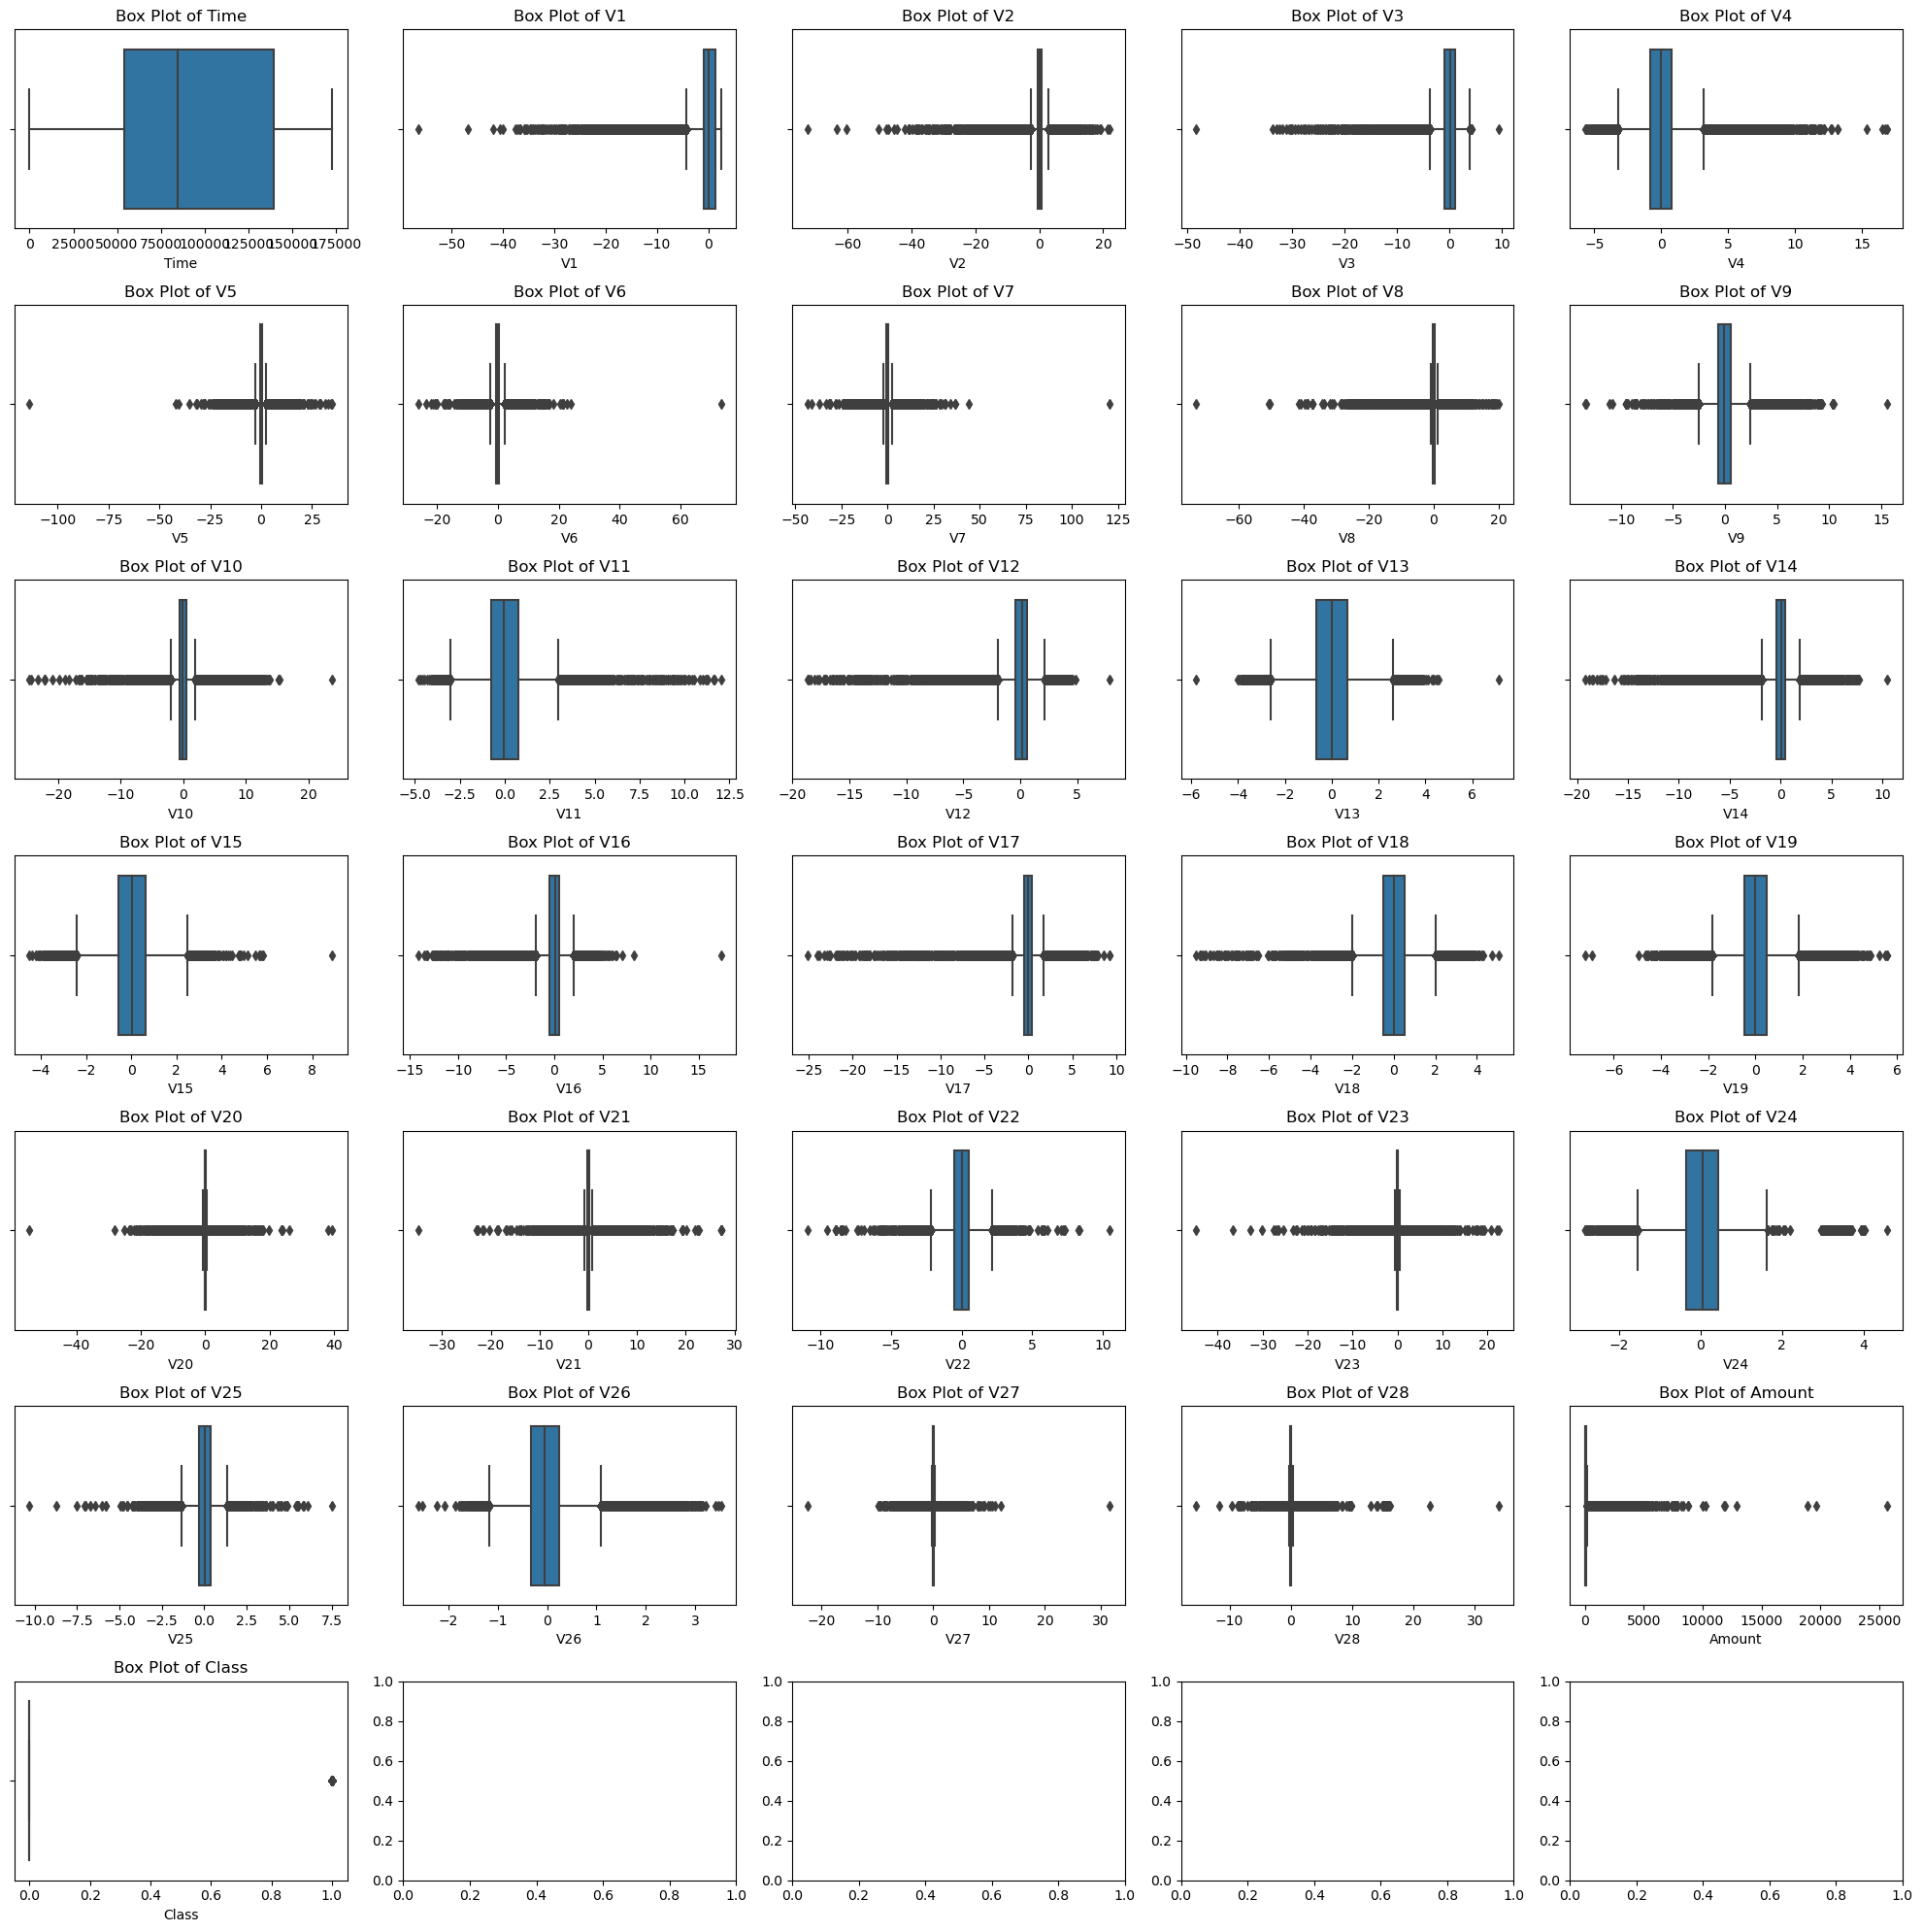

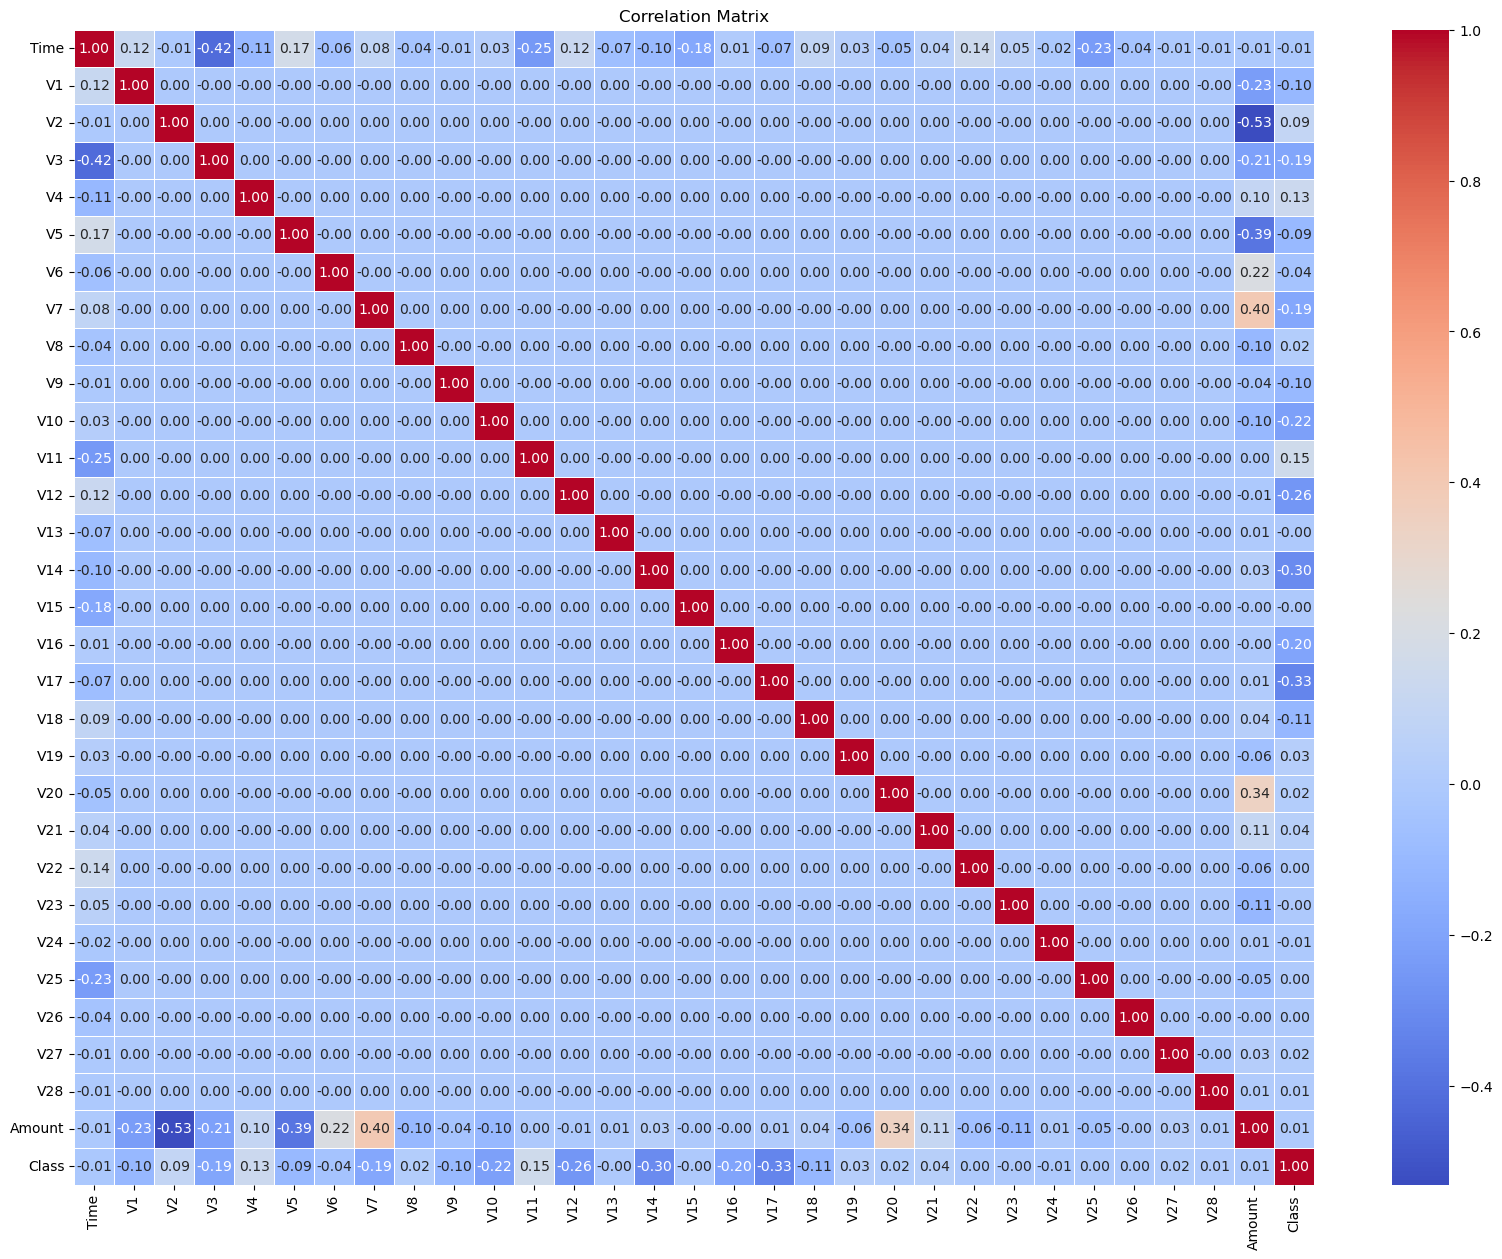

In [5]:
# Plotting Histograms for each feature
def plot_histograms(df, columns, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
    for i, column in enumerate(columns):
        ax = axes[i // cols, i % cols]
        sns.histplot(df[column], bins=50, ax=ax, kde=True)
        ax.set_title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()

# Select the columns to plot histograms for
columns_to_plot = data.columns
plot_histograms(data, columns_to_plot, 7, 5)  # Adjust rows and cols as necessary

# Plotting Box Plots for each feature
def plot_boxplots(df, columns, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
    for i, column in enumerate(columns):
        ax = axes[i // cols, i % cols]
        sns.boxplot(x=df[column], ax=ax)
        ax.set_title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

plot_boxplots(data, columns_to_plot, 7, 5)  # Adjust rows and cols as necessary

# Plotting Correlation Matrix
def plot_correlation_matrix(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(data)

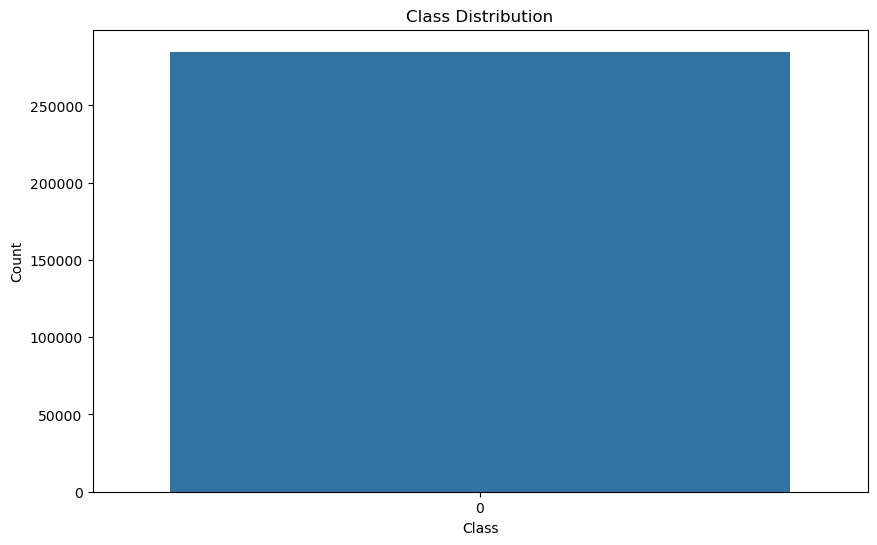

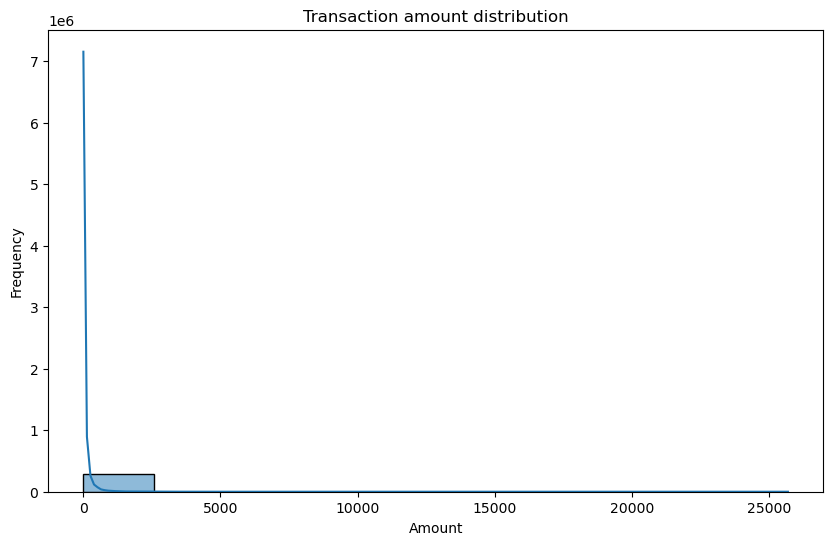

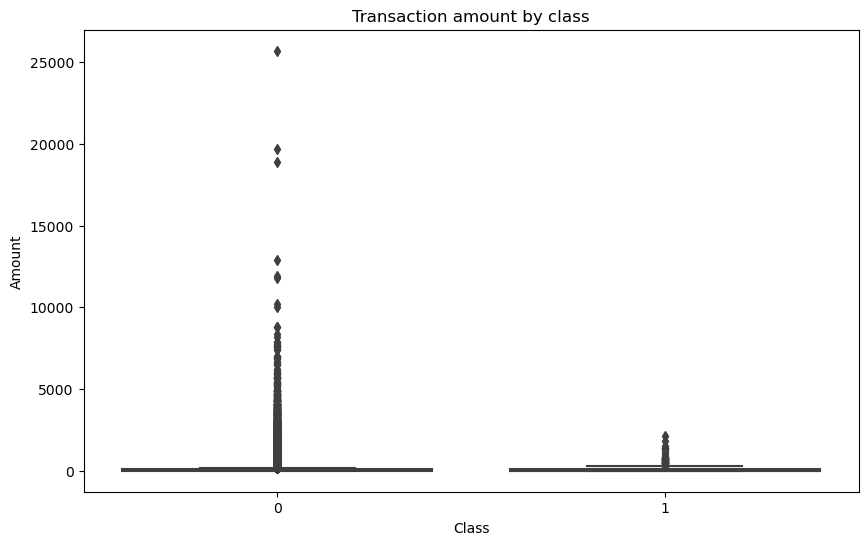

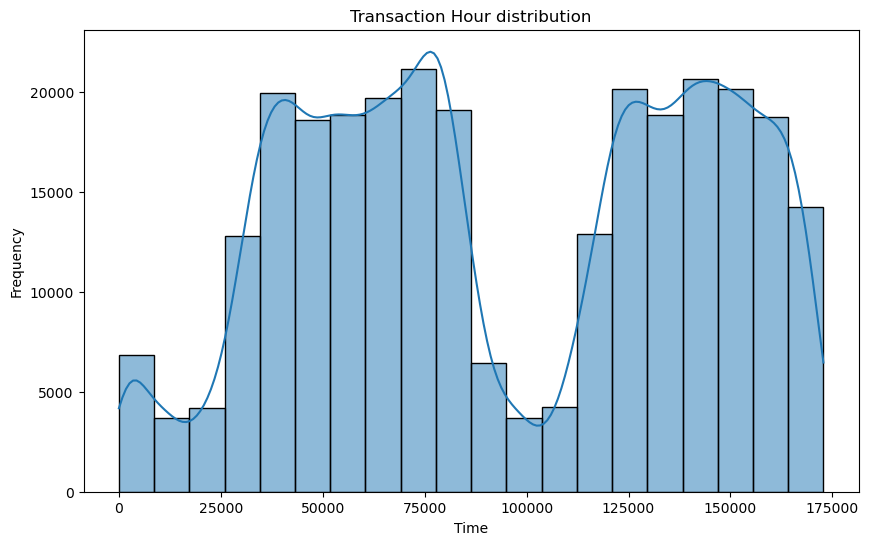

In [6]:
#Visualization
plt.figure(figsize=(10,6))
sns.countplot(data['Class'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data["Amount"], bins=10, kde= True)
plt.title('Transaction amount distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Transaction amount by class")
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data["Time"], bins=20, kde = True)
plt.title("Transaction Hour distribution")
plt.xlabel("Time")
plt.ylabel('Frequency')
plt.show()

In [7]:
##DATA PREPROCESSING###

In [8]:
##Data quality check up and data cleaning
#check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Convert 'Time' to a more interpretable format (In sec)
data['Time'] = pd.to_datetime(data['Time'], unit='s')

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Time    284807 non-null  datetime64[ns]
 1   V1      284807 non-null  float64       
 2   V2      284807 non-null  float64       
 3   V3      284807 non-null  float64       
 4   V4      284807 non-null  float64       
 5   V5      284807 non-null  float64       
 6   V6      284807 non-null  float64       
 7   V7      284807 non-null  float64       
 8   V8      284807 non-null  float64       
 9   V9      284807 non-null  float64       
 10  V10     284807 non-null  float64       
 11  V11     284807 non-null  float64       
 12  V12     284807 non-null  float64       
 13  V13     284807 non-null  float64       
 14  V14     284807 non-null  float64       
 15  V15     284807 non-null  float64       
 16  V16     284807 non-null  float64       
 17  V17     284807 non-null  floa

In [11]:
print("Class distribution \n", data['Class'].value_counts())

Class distribution 
 Class
0    284315
1       492
Name: count, dtype: int64


In [7]:
X = data.drop(columns=['Class', 'Time'])
y = data['Class']

In [8]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6)

In [9]:
#Dealing with imbalanced data
#Balancing the data
#applying random oversampling
smote_en = SMOTEENN(random_state=6)
X_resampled, y_resampled = smote_en.fit_resample(X_train, y_train)

In [10]:
# Check the new class distribution
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_resampled))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({1: 227424, 0: 226530})


In [11]:
###Feature Engineering ###

In [12]:
# Sort the dataset by 'Time'
data = data.sort_values(by='Time')

In [13]:
# New features
data['TransactionFrequency'] = 0
data['AmountPerHour'] = 0
data['AverageAmount'] = 0
data['TimeSinceLastTransaction'] = 0
data['AmountRatio'] = 0
data['DayOfWeek'] = data['Time'].dt.dayofweek

In [14]:
# Define the time window in seconds (e.g., 1 hour)
time_window = timedelta(hours=1)

In [15]:
#Calculate the features for each transaction
for idx, row in data.iterrows():
    start_time = row['Time'] - time_window
    end_time = row['Time']
    
    # Transactions in the last hour
    transactions_last_hour = data[(data['Time'] >= start_time) & (data['Time'] < end_time)]
    frequency = transactions_last_hour.shape[0] - 1
    amount_per_hour = transactions_last_hour['Amount'].sum() - row['Amount']
    average_amount = transactions_last_hour['Amount'].mean()
    
    # Time since last transaction
    if idx > 0:
        previous_transaction_time = data.iloc[idx - 1]['Time']
        time_since_last_transaction = (row['Time'] - previous_transaction_time).total_seconds()
    else:
        time_since_last_transaction = None  # No previous transaction for the first row
    
    # Amount ratio
    amount_ratio = row['Amount'] / average_amount if average_amount != 0 else None

    data.at[idx, 'TransactionFrequency'] = frequency
    data.at[idx, 'AmountPerHour'] = amount_per_hour
    data.at[idx, 'AverageAmount'] = average_amount
    data.at[idx, 'TimeSinceLastTransaction'] = time_since_last_transaction
    data.at[idx, 'AmountRatio'] = amount_ratio

In [16]:
# Fill NaN values in new features with 0
data.fillna(0, inplace=True)

In [17]:
# Save the updated dataset
data.to_csv('D:\Madhubalaji\capstone\creditcard\creditcard_with_new_features.csv', index=False)

In [33]:
print(data.head())

                 Time        V1        V2        V3        V4        V5  \
0 1970-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 1970-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 1970-01-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 1970-01-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 1970-01-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       V27       V28  Amount  \
0  0.462388  0.239599  0.098698  0.363787  ...  0.133558 -0.021053  149.62   
1 -0.082361 -0.078803  0.085102 -0.255425  ... -0.008983  0.014724    2.69   
2  1.800499  0.791461  0.247676 -1.514654  ... -0.055353 -0.059752  378.66   
3  1.247203  0.237609  0.377436 -1.387024  ...  0.062723  0.061458  123.50   
4  0.095921  0.592941 -0.270533  0.817739  ...  0.219422  0.215153   69.99   

   Class  TransactionFrequency  AmountPerHour  AverageAmount  \
0      0        

In [18]:
#scaling data
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_resampled_scaled = scaler.transform(X_test)

In [42]:
#LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_resampled_scaled, y_resampled)

LogisticRegression(max_iter=1000)

In [44]:
#Evaluate model
train_accuray = log_reg.score(X_train_resampled_scaled, y_resampled)
test_accuracy = log_reg.score(X_test_resampled_scaled, y_test)

In [45]:
y_prediction = log_reg.predict(X_test_resampled_scaled)
conf_matrix = confusion_matrix(y_test, y_prediction)
class_report = classification_report(y_test, y_prediction)

In [46]:
print("Training accuracy : ", train_accuray)
print("Testing accuracy : ", test_accuracy)
print("Classification_report: \n", classification_report(y_test,y_prediction))
print("Confusion matrix:\n", confusion_matrix(y_test, y_prediction))

Training accuracy :  0.9602162333628518
Testing accuracy :  0.9794073241810329
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Confusion matrix:
 [[55699  1165]
 [    8    90]]


In [47]:
#Gradientboosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_resampled_scaled, y_resampled)

GradientBoostingClassifier()

In [48]:
#Evaluate model
gb_train_accuray = gb_classifier.score(X_train_resampled_scaled, y_resampled)
gb_test_accuracy = gb_classifier.score(X_test_resampled_scaled, y_test)

In [49]:
gb_y_pred = gb_classifier.predict(X_test_resampled_scaled)
gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)
gb_class_report = classification_report(y_test, gb_y_pred)

In [50]:
print("GradientBoostingClassifier Training accuracy : \n", gb_train_accuray)
print("GradientBoostingClassifier Testing accuracy : \n", gb_test_accuracy)
print("GradientBoostingClassifier Classification_report: \n", gb_class_report)
print("GradientBoostingClassifier Confusion matrix:\n", gb_conf_matrix)

GradientBoostingClassifier Training accuracy : 
 0.9838287579798835
GradientBoostingClassifier Testing accuracy : 
 0.986885994171553
GradientBoostingClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.92      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962

GradientBoostingClassifier Confusion matrix:
 [[56125   739]
 [    8    90]]


In [51]:
#SupportVector machine
SVC_classifier = SVC()
SVC_classifier.fit(X_train_resampled_scaled, y_resampled)

SVC()

In [ ]:
#Evaluate model
SVC_train_accuracy = SVC_classifier.score(X_train_resampled_scaled, y_resampled)
SVC_test_accuracy = SVC_classifier.score(X_test_resampled_scaled, y_test)

In [ ]:
SVC_y_prediction = SVC_classifier.fit(X_train_resampled_scaled, y_resampled).predict(X_test_resampled_scaled)
SVC_conf_matrix = confusion_matrix(y_test,SVC_y_prediction)
SVC_classreport = classification_report(y_test, SVC_y_prediction)

In [ ]:
print("SVC Training accuracy : \n", SVC_train_accuracy)
print("SVC : \n", SVC_test_accuracy)
print("SVC Classification_report: \n", SVC_classreport)
print("SVC Confusion matrix:\n", SVC_conf_matrix)

In [19]:
##RandomForest Classifier
RF_Classifier = RandomForestClassifier()
RF_Classifier.fit(X_train_resampled_scaled, y_resampled)

RandomForestClassifier()

In [20]:
#Evaluate model
RFC_train_accuracy = RF_Classifier.score(X_train_resampled_scaled, y_resampled)
RFC_test_accuracy = RF_Classifier.score(X_test_resampled_scaled, y_test)

In [21]:
RFC_prediction = RF_Classifier.predict(X_test_resampled_scaled)
RFC_confusion_matrix = confusion_matrix(y_test, RFC_prediction)
RFC_classreport = classification_report(y_test, RFC_prediction)

In [22]:
print("RFC Training accuracy : \n", RFC_train_accuracy)
print("RFC Testing accuracy: \n", RFC_test_accuracy)
print("RFC Classification_report: \n", RFC_classreport)
print("RFC Confusion matrix:\n", RFC_confusion_matrix)

RFC Training accuracy : 
 1.0
RFC Testing accuracy: 
 0.9995786664794073
RFC Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.88      0.88        98

    accuracy                           1.00     56962
   macro avg       0.94      0.94      0.94     56962
weighted avg       1.00      1.00      1.00     56962

RFC Confusion matrix:
 [[56852    12]
 [   12    86]]


###Best model selection

In [23]:
# Hyperparameter tuning
param_grid = {
    'n_estimators' : [100,200],
    'max_depth' :[None, 10],
    'min_samples_split': [2,3],
    'min_samples_leaf' : [1,2]
}

In [24]:
#perform grid search
grid_search = GridSearchCV(estimator=RF_Classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled_scaled, y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [25]:
#best parameters
best_params = grid_search.best_params_
print("Best Parameters: \n", best_params)

Best Parameters: 
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [26]:
from sklearn.ensemble import RandomForestClassifier
import pickle

In [27]:
##RandomForest Classifier
RF_Classifier = RandomForestClassifier()
model= RF_Classifier.fit(X_train_resampled_scaled, y_resampled)

In [28]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model,f)

In [29]:
import pickle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
    
print("Model loaded successfully")

Model loaded successfully


In [ ]:
import os
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Define the path to your model file correctly
model_path = os.path.join(os.getcwd(), 'model.pkl')

# Load the model
with open(model_path, 'rb') as f:
    model = pickle.load(f)

@app.route('/')
def home():
    return "Welcome to the model prediction API!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([data['input']])
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=8080)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8080
 * Running on http://192.168.1.66:8080
Press CTRL+C to quit


In [ ]:
python app.py